# Import Libraries

In [109]:
# for data processing 
import numpy as np 
import pandas as pd

# for data visualization
import seaborn as sns 
import matplotlib.pyplot as plt

# for create dummies
from pandas import get_dummies

# for preprocessing 
from sklearn.preprocessing import StandardScaler 

# for clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

# Data Loading

In [3]:
df = pd.read_csv("customer_data-1.csv")

In [4]:
# lets check head of the data 
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0    04/09/12       58       635  ...                  7             0   
1    08/03/14       38        11  ...                  5             0   
2    21/08/13       26       426  ...                  4             0   
3    10/02/14       26        11  ...                  6             0   
4    19/01/14       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [5]:
# lets check shape of the data set 
df.shape

(2240, 29)

In [6]:
# lets check size of the data set 
df.size

64960

In [7]:
# lets check columns of the data set 
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [8]:
# lets check info of the data set 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [8]:
#It shows Dt_Customer as object but it is a date

In [9]:
#lets convert Dt_Customer to date formate

df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])

In [10]:
# lets describe data set 
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

In [12]:
# lets check null values in dataset 

df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [13]:
# income feature has 24 null values 

In [14]:
# lets treat null values
df=df.dropna()

In [15]:
# lets create new column Age

df["Age"]= 2023-df['Year_Birth']

# lets create another column- name 'kids'
df['Kids']=df['Kidhome']+df['Teenhome']


In [16]:
# lets check education catagories 

df["Education"].value_counts()


Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [18]:
# Reducing the number of catagories from education feature

df['Education']=df['Education'].replace({'Graduation':'Graduate', 'PhD':'Postgraduate', 
                                         'Master':'Postgraduate','2n Cycle':'Postgraduate',
                                         'Basic': 'Undergraduate'})

In [19]:
# lets check marital status

df['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [21]:
# Reducing the number of catagories from Marital_Status feature

df['Status']=df['Marital_Status'].replace({"Married":'Partner', 'Together':'Partner', 'Single':'Alone', 
                                           'Divorced':'Alone', 'Widow': 'Alone', 'Absurd':'Alone', 'YOLO':'Alone'})

In [23]:
# lets create a new feature Parent

df['Parent']=df['Kids'].apply(lambda x: 1 if x!=0 else 0)

In [25]:
# Lets create a new feature Total_spent

df['Total_spent']=df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']

In [26]:
# lets create a new column Accepted_Cmp_total

cmp_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Response']
df['Accepted_Cmp_total'] = df[cmp_cols].sum(axis=1)

In [27]:
df.shape

(2216, 35)

In [28]:
# Breaking down the date of customer's enrollment

df['Day'] = df['Dt_Customer'].apply(lambda x: x.day)
df['Dayofweek'] = df['Dt_Customer'].apply(lambda x: x.day_name())
df['Month'] = df['Dt_Customer'].apply(lambda x: x.month)
df['Year'] = df['Dt_Customer'].apply(lambda x: x.year)


In [29]:
df.head()

ID  Year_Birth     Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957      Graduate         Single  58138.0        0         0   
1  2174        1954      Graduate         Single  46344.0        1         1   
2  4141        1965      Graduate       Together  71613.0        0         0   
3  6182        1984      Graduate       Together  26646.0        1         0   
4  5324        1981  Postgraduate        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  Age  Kids   Status  Parent  \
0  2012-04-09       58       635  ...   66     0    Alone       0   
1  2014-08-03       38        11  ...   69     2    Alone       1   
2  2013-08-21       26       426  ...   58     0  Partner       0   
3  2014-10-02       26        11  ...   39     1  Partner       1   
4  2014-01-19       94       173  ...   42     1  Partner       1   

   Total_spent  Accepted_Cmp_total  Day  Dayofweek  Month  Year  
0         1617                   1    9     Monday      4  2012  
1           27                   0    3     Sunday      8  2014  
2          776                   0   21  Wednesday      8  2013  
3           53                   0    2   Thursday     10  2014  
4          422                   0   19     Sunday      1  2014  

[5 rows x 39 columns]

In [30]:
#Lets create a new feature total_purchases

purchase_total = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
df['total_purchases'] = df[purchase_total].sum(axis=1)

In [31]:
# Lets drop some unnecessory features 

df=df.drop(['ID', 'Year_Birth', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Marital_Status', 'Z_Revenue', 'Z_CostContact', 
           'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Response'], axis=1)

In [32]:
df.shape

(2216, 26)

In [35]:
# lets check outliers from some features 

print('Age:\n')
print(df['Age'].sort_values().tail(5))

print('\nIncome:\n')
print(df['Income'].sort_values().tail(5))


Age:

424      82
1950     83
192     123
339     124
239     130
Name: Age, dtype: int64

Income:

164     157243.0
1300    157733.0
687     160803.0
617     162397.0
2233    666666.0
Name: Income, dtype: float64


In [36]:
# lets treat that unusual values 

# for Age 
df=df[(df['Age']<85)]

# for income 
df = df.drop(2233)

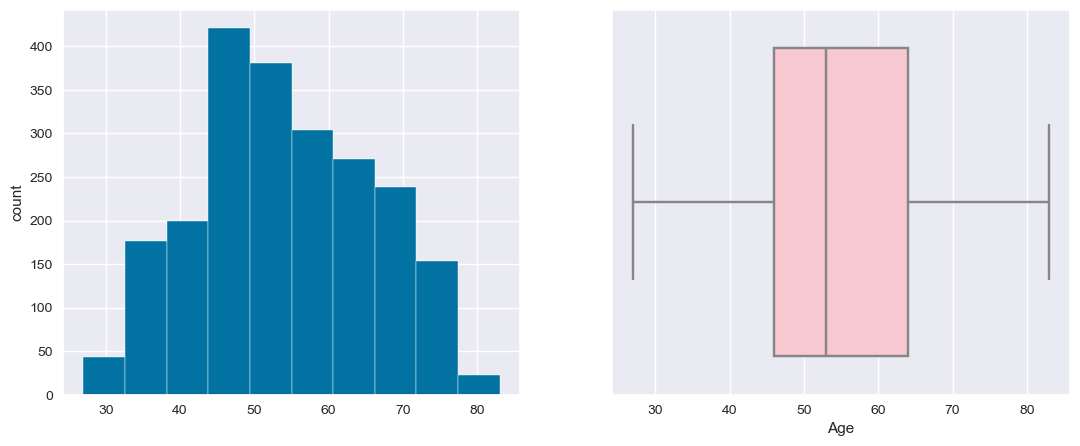

In [76]:
# Lets recheck outliers of age feature 

plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
df["Age"].hist()
plt.ylabel('count')
plt.subplot(1,2,2)
colors = ['pink', 'lightblue', 'lightgreen']
sns.boxplot(x=df['Age'], color ='pink')
plt.show()

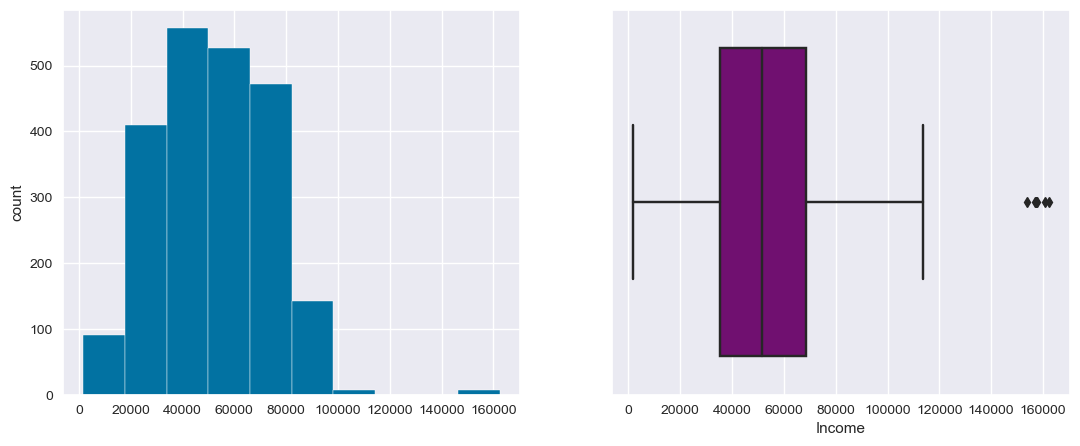

In [78]:
# Lets recheck outliers of income feature 

plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
df["Income"].hist()
plt.ylabel('count')
plt.subplot(1,2,2)
sns.boxplot(x=df['Income'], color = 'purple')
plt.show()

# Data Visualization 

Text(0.5, 1.05, 'Feature Relationship')

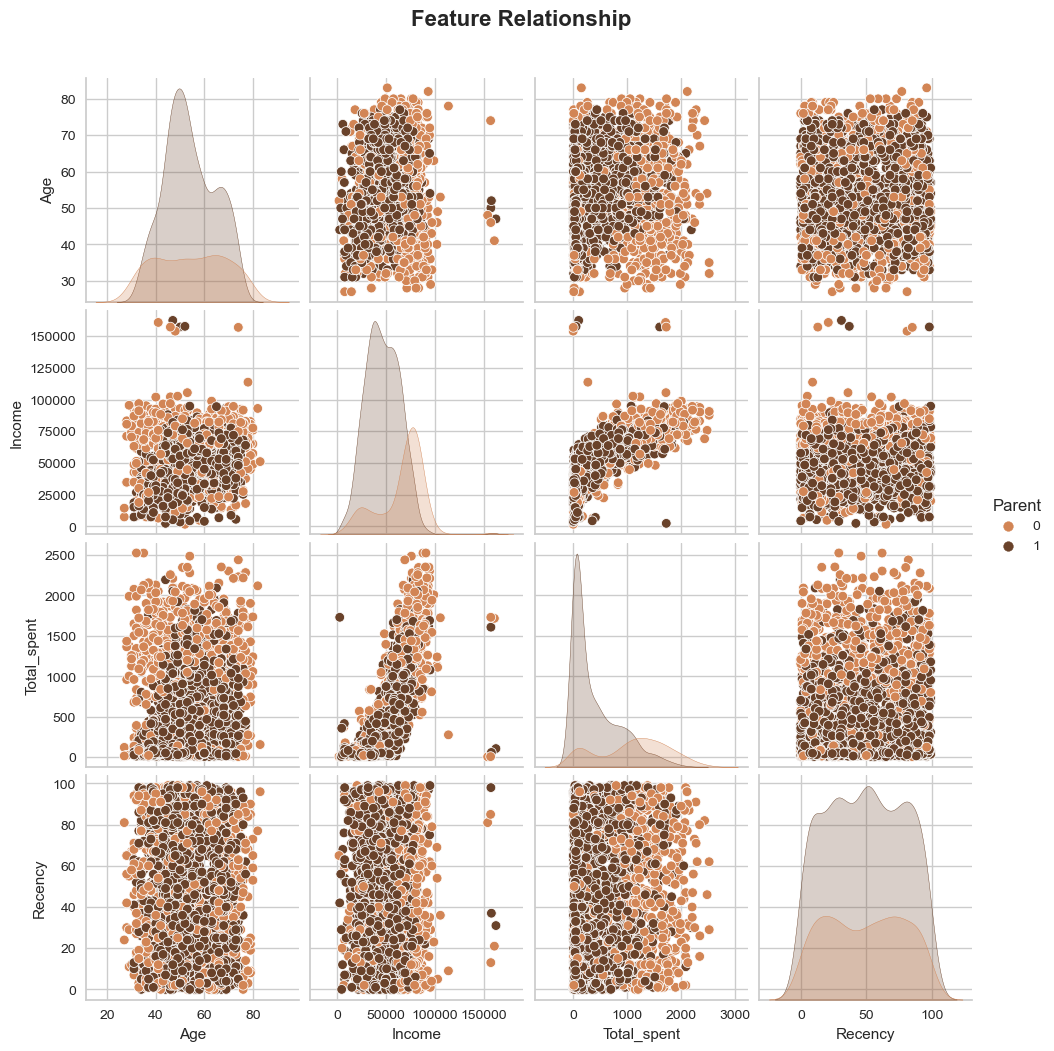

In [52]:
# Lets create pair plot for some features 

data = ['Age', 'Income', 'Total_spent', 'Recency', 'Parent']

plot = sns.pairplot(df[data], hue='Parent', palette='copper_r')
plot.fig.suptitle('Feature Relationship', y=1.05, weight='bold', fontsize=16)

In [40]:
# grouping age

group = pd.cut(df['Age'], [10, 20, 30, 40, 50, 60, 70, 80])
group.value_counts()

(40, 50]    614
(50, 60]    613
(60, 70]    458
(30, 40]    283
(70, 80]    227
(20, 30]     15
(10, 20]      0
Name: Age, dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_6288\3425498426.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=group, y='NumDealsPurchases', hue='Parent', ci=None, palette='vlag')


<AxesSubplot:title={'center':'Average Number of Purchases Made with a Discount\nby Age Groups'}, xlabel='Age', ylabel='NumDealsPurchases'>

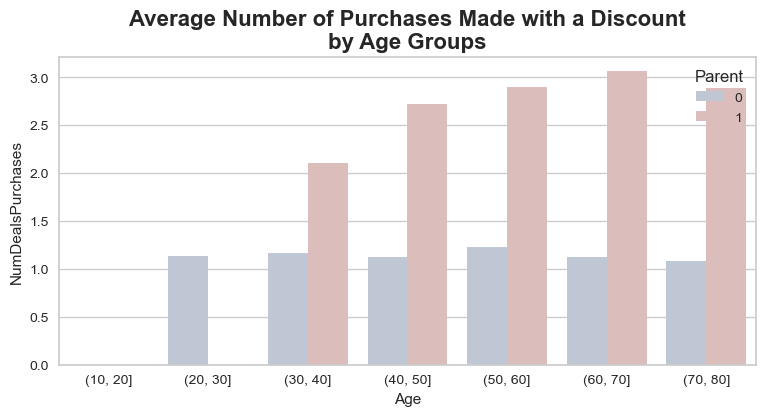

In [60]:
# lets create barplot to check purchases with discount by age group 

plt.figure(figsize=(9,4))
plt.title('Average Number of Purchases Made with a Discount\nby Age Groups', weight='bold', fontsize=16)
sns.barplot(data=df, x=group, y='NumDealsPurchases', hue='Parent', ci=None, palette='vlag')

C:\Users\HP\AppData\Local\Temp\ipykernel_6288\1277769292.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=group, y='NumDealsPurchases', hue='Kids', ci=None, palette='rocket')


<AxesSubplot:title={'center':'Average Number of Purchases Made with a Discount\nby Age Groups'}, xlabel='Age', ylabel='NumDealsPurchases'>

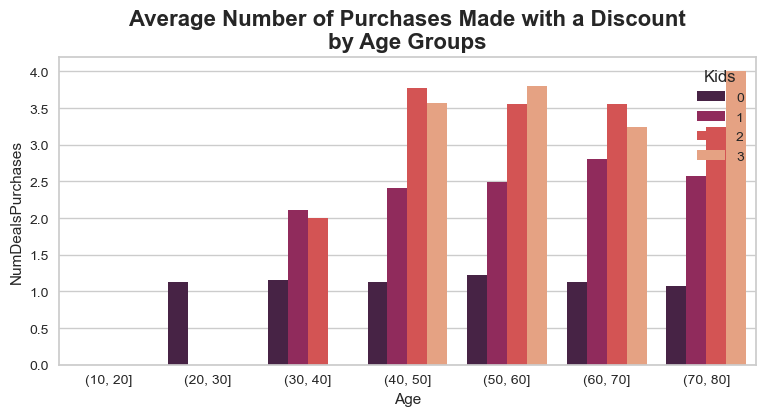

In [50]:
# lets create barplot to check purchases with discount by age group 

plt.figure(figsize=(9,4))
plt.title('Average Number of Purchases Made with a Discount\nby Age Groups', weight='bold', fontsize=16)
#sns.barplot(data=df, x=group, y='NumDealsPurchases', hue='Kids', ci=None, palette='YlOrRd')
sns.barplot(data=df, x=group, y='NumDealsPurchases', hue='Kids', ci=None, palette='YlOrRd')

<AxesSubplot:xlabel='Income', ylabel='Age'>

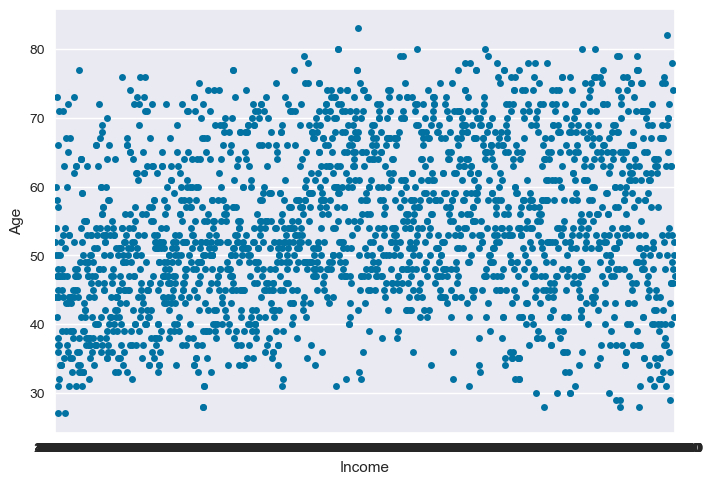

In [65]:
#Lets create Stripplot 

sns.set_style("darkgrid")
sns.stripplot(x="Income", y="Age", data=df)

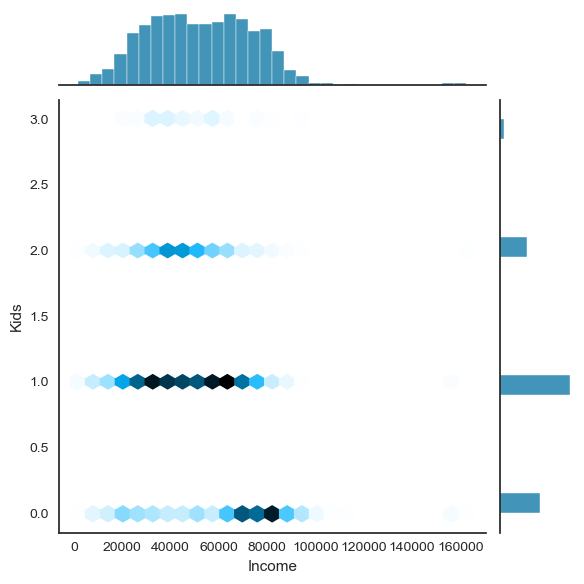

In [73]:
#lets create jointplot 

with sns.axes_style('ticks'):
    sns.jointplot(x="Income", y="Kids", data=df, kind='hex');


In [61]:
# lets convert object of numeric value using dummies

obj=df.select_dtypes(exclude=[np.number]).columns

dummies=get_dummies(df[obj])
df=pd.concat([df, dummies], axis=1)

#lets drop object features

df.drop(obj, axis=1, inplace=True)
df.head()


Income  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  58138.0       58       635         88              546              172   
1  46344.0       38        11          1                6                2   
2  71613.0       26       426         49              127              111   
3  26646.0       26        11          4               20               10   
4  58293.0       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  ...  \
0                88            88                  3                8  ...   
1                 1             6                  2                1  ...   
2                21            42                  1                8  ...   
3                 3             5                  2                2  ...   
4                27            15                  5                5  ...   

   Education_Undergraduate  Status_Alone  Status_Partner  Dayofweek_Friday  \
0                        0             1               0                 0   
1                        0             1               0                 0   
2                        0             0               1                 0   
3                        0             0               1                 0   
4                        0             0               1                 0   

   Dayofweek_Monday  Dayofweek_Saturday  Dayofweek_Sunday  Dayofweek_Thursday  \
0                 1                   0                 0                   0   
1                 0                   0                 1                   0   
2                 0                   0                 0                   0   
3                 0                   0                 0                   1   
4                 0                   0                 1                   0   

   Dayofweek_Tuesday  Dayofweek_Wednesday  
0                  0                    0  
1                  0                    0  
2                  0                    1  
3                  0                    0  
4                  0                    0  

[5 rows x 35 columns]

In [62]:
df.shape

(2212, 35)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Income                   2212 non-null   float64
 1   Recency                  2212 non-null   int64  
 2   MntWines                 2212 non-null   int64  
 3   MntFruits                2212 non-null   int64  
 4   MntMeatProducts          2212 non-null   int64  
 5   MntFishProducts          2212 non-null   int64  
 6   MntSweetProducts         2212 non-null   int64  
 7   MntGoldProds             2212 non-null   int64  
 8   NumDealsPurchases        2212 non-null   int64  
 9   NumWebPurchases          2212 non-null   int64  
 10  NumCatalogPurchases      2212 non-null   int64  
 11  NumStorePurchases        2212 non-null   int64  
 12  NumWebVisitsMonth        2212 non-null   int64  
 13  Complain                 2212 non-null   int64  
 14  Age                     

In [79]:
# lets scale the data

from sklearn.preprocessing import StandardScaler

# initialize scaler
standardizer = StandardScaler()

# fit and transform on data
scaled =  standardizer.fit_transform(df)


# save into diff data
df1_final = pd.DataFrame(scaled)
df1_final.columns = df.columns
df1_final.head()


Income   Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  0.287105  0.310353  0.977660   1.552041         1.690293         2.453472   
1 -0.260882 -0.380813 -0.872618  -0.637461        -0.718230        -0.651004   
2  0.913196 -0.795514  0.357935   0.570540        -0.178542         1.339513   
3 -1.176114 -0.795514 -0.872618  -0.561961        -0.655787        -0.504911   
4  0.294307  1.554453 -0.392257   0.419540        -0.218684         0.152508   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  ...  \
0          1.483713      0.852576           0.351030         1.426865  ...   
1         -0.634019     -0.733642          -0.168701        -1.126420  ...   
2         -0.147184     -0.037254          -0.688432         1.426865  ...   
3         -0.585335     -0.752987          -0.168701        -0.761665  ...   
4         -0.001133     -0.559545           1.390492         0.332600  ...   

   Education_Undergraduate  Status_Alone  Status_Partner  Dayofweek_Friday  \
0                -0.158187      1.349603       -1.349603         -0.399921   
1                -0.158187      1.349603       -1.349603         -0.399921   
2                -0.158187     -0.740959        0.740959         -0.399921   
3                -0.158187     -0.740959        0.740959         -0.399921   
4                -0.158187     -0.740959        0.740959         -0.399921   

   Dayofweek_Monday  Dayofweek_Saturday  Dayofweek_Sunday  Dayofweek_Thursday  \
0          2.481648           -0.395347         -0.427654           -0.406740   
1         -0.402958           -0.395347          2.338340           -0.406740   
2         -0.402958           -0.395347         -0.427654           -0.406740   
3         -0.402958           -0.395347         -0.427654            2.458574   
4         -0.402958           -0.395347          2.338340           -0.406740   

   Dayofweek_Tuesday  Dayofweek_Wednesday  
0           -0.40674            -0.417997  
1           -0.40674            -0.417997  
2           -0.40674             2.392364  
3           -0.40674            -0.417997  
4           -0.40674            -0.417997  

[5 rows x 35 columns]

# PCA

In [81]:
pca = PCA(n_components = 10)
pca.fit(df1_final)

PCA(n_components=10)

In [82]:
print(pca.explained_variance_)

[8.37087126 2.31989639 2.05019496 2.01109406 1.50725199 1.23618309
 1.2151581  1.19322592 1.17347526 1.16029296]


In [83]:
print(pca.components_)

[[ 2.90711287e-01  3.50043005e-03  2.71867046e-01  2.36044916e-01
   2.84430738e-01  2.45522493e-01  2.36697195e-01  1.95804518e-01
  -4.36098863e-02  1.93830828e-01  2.85848877e-01  2.57122171e-01
  -2.13711490e-01 -1.12966252e-02  4.69767121e-02 -2.05281526e-01
  -2.09806228e-01  3.28908211e-01  1.45528100e-01 -5.11972424e-03
   6.16198924e-03 -3.46508137e-02  3.05914320e-01  2.03400857e-02
  -3.43162054e-03 -5.47977224e-02  1.13728050e-02 -1.13728050e-02
   2.23020033e-02  6.08520638e-03  8.67641498e-03 -9.56927364e-03
  -1.11808933e-02 -8.16891499e-03 -7.17369225e-03]
 [ 5.26394676e-02 -3.09956329e-05  1.91634181e-01 -1.07399847e-01
  -8.75192111e-02 -1.12706013e-01 -8.72866669e-02  7.15662422e-02
   4.44849435e-01  3.41595645e-01  3.34461065e-02  1.71946664e-01
   2.25932832e-01 -1.93922473e-03  1.79756962e-01  3.22994439e-01
   3.33514438e-01  5.75724409e-02 -8.87565598e-05  1.15965751e-02
   6.92373236e-02 -1.98916034e-01  2.21169686e-01 -1.96738333e-01
   2.35086408e-01 -1.2302

In [84]:
print(pca.explained_variance_ratio_)


[0.23905963 0.06625279 0.05855052 0.05743385 0.04304487 0.03530355
 0.03470311 0.03407676 0.03351271 0.03313624]


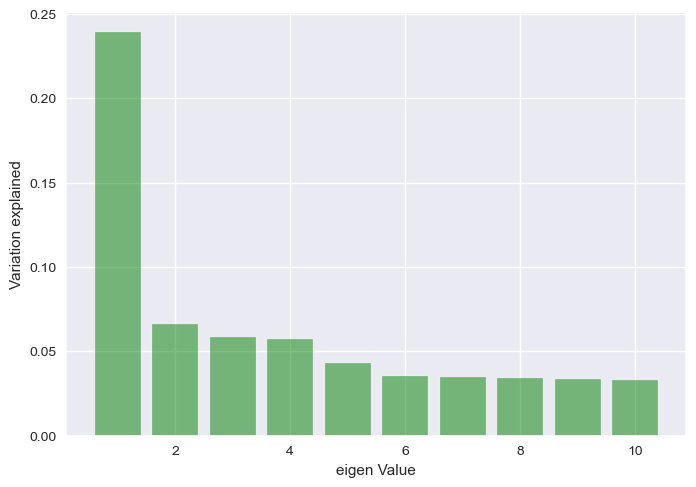

In [90]:
# Lets create a bar plot of variation and eigen values

plt.bar(list(range(1,11)),pca.explained_variance_ratio_,alpha=0.5, align='center', color='green')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

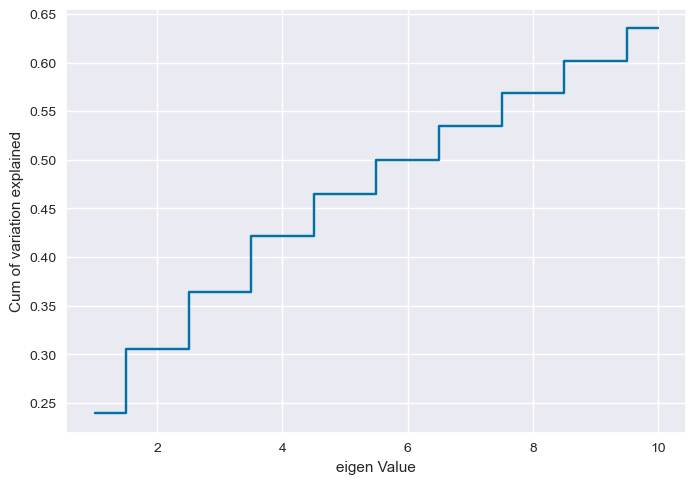

In [92]:
# lets create step plot 

plt.step(list(range(1,11)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()


In [93]:
pca2 = PCA(n_components=9)
pca2.fit(df1_final)
print(pca2.components_)
print(pca2.explained_variance_ratio_)
Xpca2 = pca2.transform(df1_final)


[[ 2.90711491e-01  3.50004324e-03  2.71868304e-01  2.36044081e-01
   2.84429704e-01  2.45521691e-01  2.36696585e-01  1.95803574e-01
  -4.36123704e-02  1.93832208e-01  2.85848037e-01  2.57123569e-01
  -2.13711187e-01 -1.12960570e-02  4.69764158e-02 -2.05282027e-01
  -2.09805585e-01  3.28908280e-01  1.45528093e-01 -5.11945535e-03
   6.16137420e-03 -3.46507896e-02  3.05915134e-01  2.03404181e-02
  -3.43221833e-03 -5.47968659e-02  1.13729750e-02 -1.13729750e-02
   2.23024762e-02  6.08458926e-03  8.67677091e-03 -9.56945010e-03
  -1.11802261e-02 -8.16879170e-03 -7.17448724e-03]
 [ 5.27170228e-02 -3.59816198e-04  1.92481173e-01 -1.08177970e-01
  -8.80305977e-02 -1.13549381e-01 -8.80766556e-02  7.06977641e-02
   4.43684450e-01  3.42638107e-01  3.30286624e-02  1.72951671e-01
   2.26189262e-01 -1.54046372e-03  1.79574548e-01  3.22315289e-01
   3.33549088e-01  5.75998970e-02 -2.19866732e-04  1.18733403e-02
   6.87614283e-02 -1.98804135e-01  2.21850251e-01 -1.96344228e-01
   2.34543913e-01 -1.2255

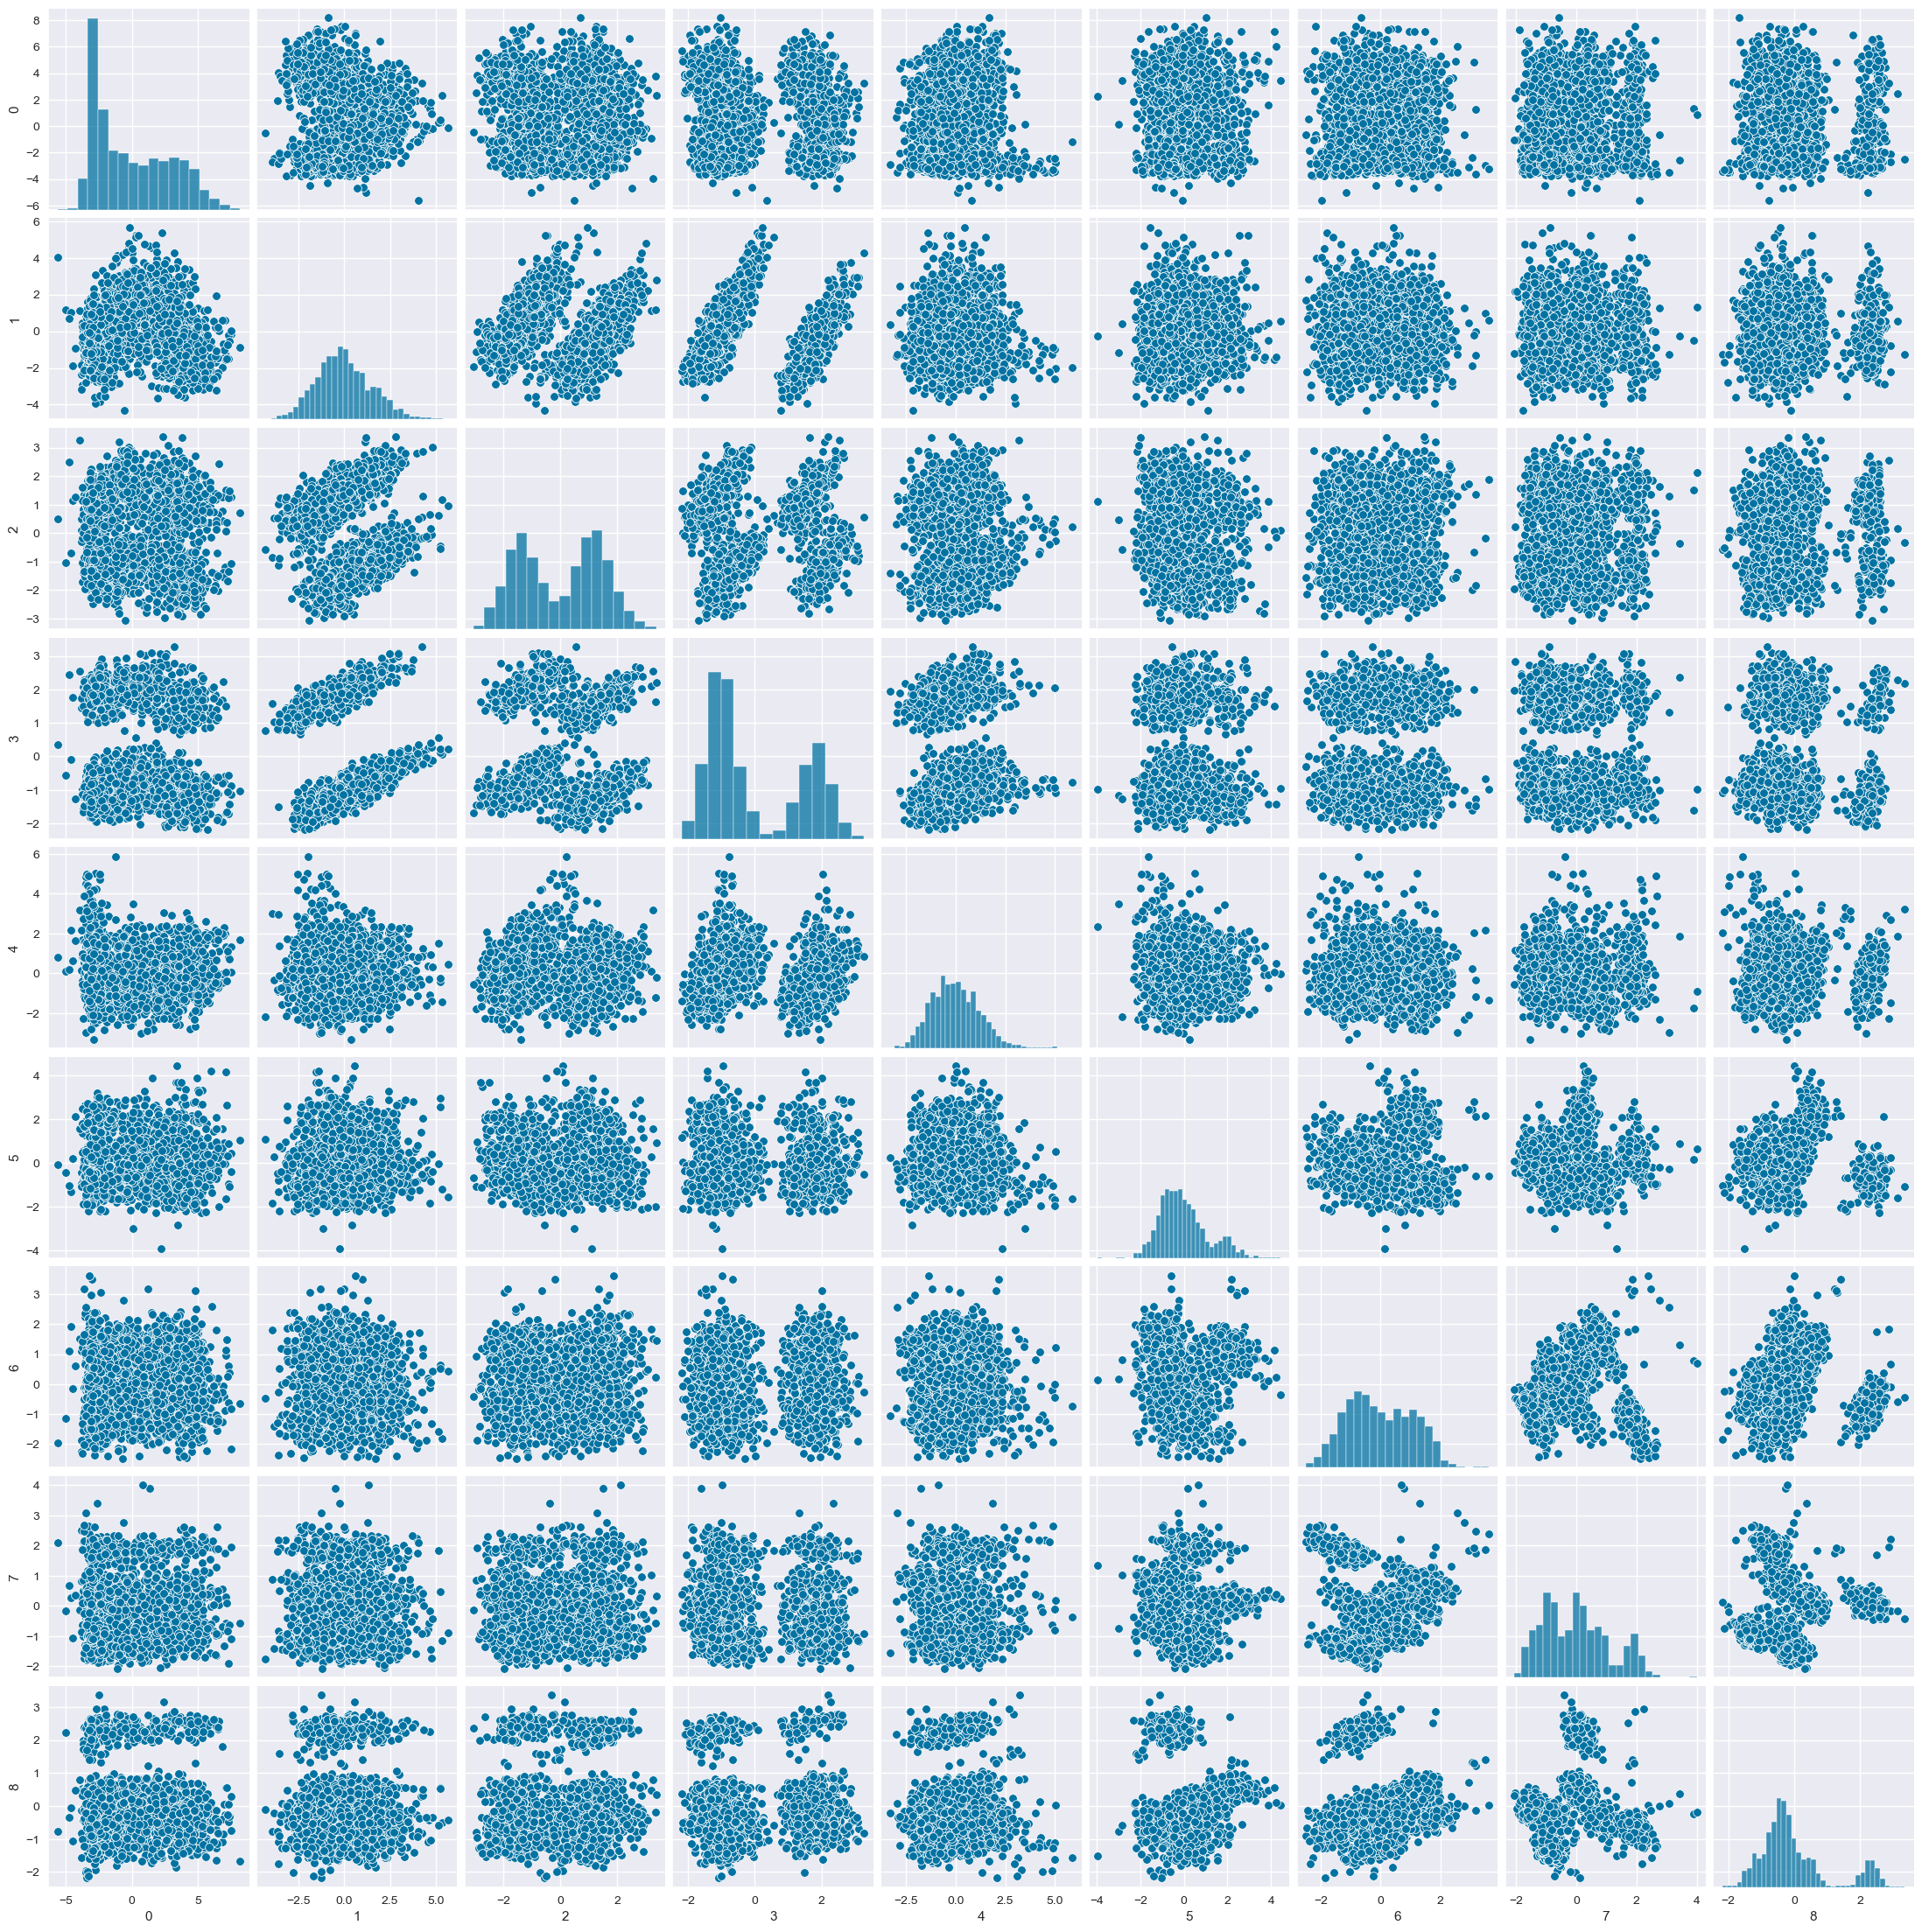

In [94]:
# lets create pairplot 

sns.pairplot(pd.DataFrame(Xpca2))


In [95]:
Xpca2 = pd.DataFrame(Xpca2)

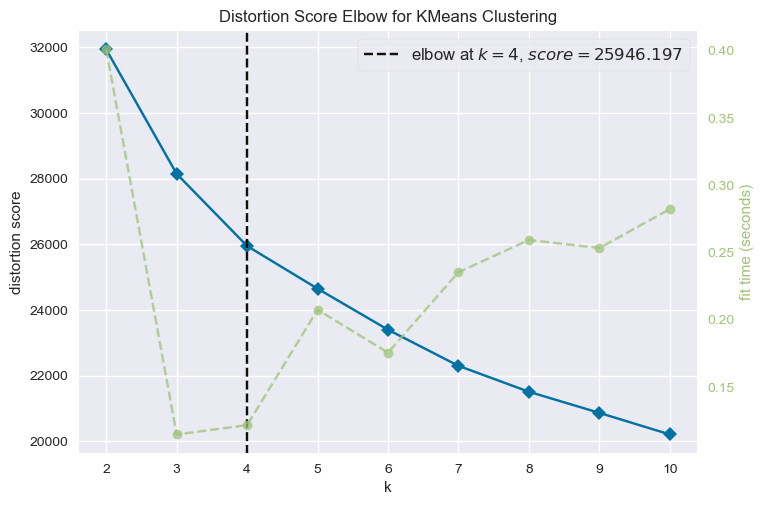

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [96]:
# In order to get the number of clusters for Kmeans Clustering we will apply elbow mehtod.
Elbow_k = KElbowVisualizer(KMeans(), k = 10)
Elbow_k.fit(Xpca2)
Elbow_k.show()


# Clustering

In [97]:
model = KMeans(n_clusters = 4)

model.fit(Xpca2)
prediction=model.predict(Xpca2)

#Append the prediction 
Xpca2["GROUP"] = prediction
print("Groups Assigned : \n")
Xpca2.head()

Groups Assigned : 



0         1         2         3         4         5         6  \
0  4.817882 -0.646012  1.818904  1.908829  0.859021  0.112391 -1.071116   
1 -2.886427 -1.305971  0.622455  1.535197 -2.518448 -0.171603  1.692693   
2  2.358633 -0.586653  1.009928 -1.229498  0.006161  0.222232 -1.002250   
3 -2.828025 -1.112199  0.816164 -1.521006 -0.271613 -0.020326 -0.262874   
4 -0.399124  0.933554 -1.241518 -0.962032 -1.808319 -1.755515  0.860352   

          7         8  GROUP  
0  1.680288 -0.386544      2  
1  0.793278 -0.390524      1  
2 -1.337201 -0.057610      2  
3  0.005868  2.160688      3  
4  0.805092 -0.935319      0

In [98]:
# Lets check silhoutte score

from sklearn.metrics import silhouette_score

print(f"The silhouette score for the model is: {silhouette_score(Xpca2,prediction )}")

The silhouette score for the model is: 0.22121836374980938


In [100]:
# finally create a feature 'Group' for clusters 

df1_final["GROUP"] = prediction
print("Groups Assigned : \n")
df1_final.head()


Groups Assigned : 



Income   Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  0.287105  0.310353  0.977660   1.552041         1.690293         2.453472   
1 -0.260882 -0.380813 -0.872618  -0.637461        -0.718230        -0.651004   
2  0.913196 -0.795514  0.357935   0.570540        -0.178542         1.339513   
3 -1.176114 -0.795514 -0.872618  -0.561961        -0.655787        -0.504911   
4  0.294307  1.554453 -0.392257   0.419540        -0.218684         0.152508   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  ...  \
0          1.483713      0.852576           0.351030         1.426865  ...   
1         -0.634019     -0.733642          -0.168701        -1.126420  ...   
2         -0.147184     -0.037254          -0.688432         1.426865  ...   
3         -0.585335     -0.752987          -0.168701        -0.761665  ...   
4         -0.001133     -0.559545           1.390492         0.332600  ...   

   Status_Alone  Status_Partner  Dayofweek_Friday  Dayofweek_Monday  \
0      1.349603       -1.349603         -0.399921          2.481648   
1      1.349603       -1.349603         -0.399921         -0.402958   
2     -0.740959        0.740959         -0.399921         -0.402958   
3     -0.740959        0.740959         -0.399921         -0.402958   
4     -0.740959        0.740959         -0.399921         -0.402958   

   Dayofweek_Saturday  Dayofweek_Sunday  Dayofweek_Thursday  \
0           -0.395347         -0.427654           -0.406740   
1           -0.395347          2.338340           -0.406740   
2           -0.395347         -0.427654           -0.406740   
3           -0.395347         -0.427654            2.458574   
4           -0.395347          2.338340           -0.406740   

   Dayofweek_Tuesday  Dayofweek_Wednesday  GROUP  
0           -0.40674            -0.417997      2  
1           -0.40674            -0.417997      1  
2           -0.40674             2.392364      2  
3           -0.40674            -0.417997      3  
4           -0.40674            -0.417997      0  

[5 rows x 36 columns]

In [102]:
# lets grouping the data by group 

data_Clust = df1_final.groupby(['GROUP'])
data_Clust.mean()


Income   Recency  MntWines  MntFruits  MntMeatProducts  \
GROUP                                                             
0      0.385775  0.026130  0.621496   0.085714        -0.002339   
1     -0.698986 -0.051639 -0.703624  -0.501489        -0.608489   
2      1.149964  0.020821  0.926954   1.022256         1.338146   
3     -0.735737 -0.005292 -0.748646  -0.527331        -0.630721   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
GROUP                                                                       
0             0.021177          0.065629      0.474024           0.770229   
1            -0.533551         -0.515754     -0.475814          -0.005428   
2             1.126898          1.050117      0.616424          -0.615729   
3            -0.536551         -0.524243     -0.539608          -0.131060   

       NumWebPurchases  ...  Education_Undergraduate  Status_Alone  \
GROUP                   ...                                          
0             0.952284  ...                -0.158187     -0.161095   
1            -0.563105  ...                 0.152595      1.349603   
2             0.358801  ...                -0.145938      0.108703   
3            -0.664126  ...                 0.139632     -0.740959   

       Status_Partner  Dayofweek_Friday  Dayofweek_Monday  Dayofweek_Saturday  \
GROUP                                                                           
0            0.161095          0.071131         -0.002903           -0.048430   
1           -1.349603         -0.086927          0.032846            0.039512   
2           -0.108703          0.060636          0.033277            0.046963   
3            0.740959         -0.048479         -0.041378           -0.020585   

       Dayofweek_Sunday  Dayofweek_Thursday  Dayofweek_Tuesday  \
GROUP                                                            
0             -0.013764           -0.009361           0.022011   
1             -0.009770           -0.028821          -0.083791   
2             -0.025042           -0.054669          -0.043836   
3              0.034629            0.064161           0.064161   

       Dayofweek_Wednesday  
GROUP                       
0                -0.017982  
1                 0.134640  
2                -0.014240  
3                -0.053981  

[4 rows x 35 columns]

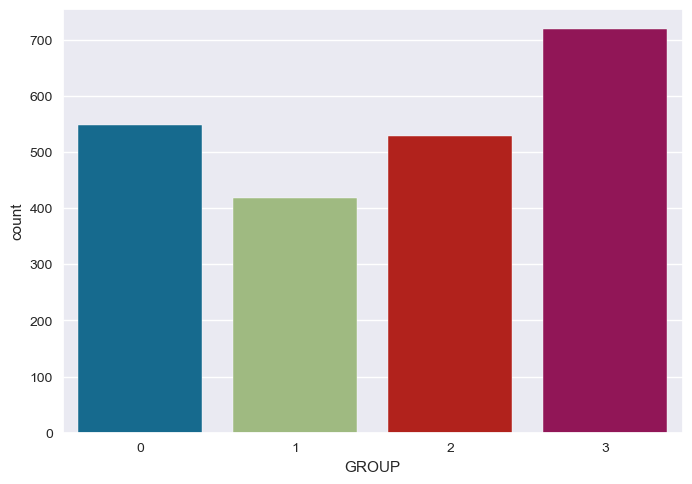

In [103]:
# lets create a count plot for Group 

count_plot = sns.countplot(x = df1_final["GROUP"])
plt.show()


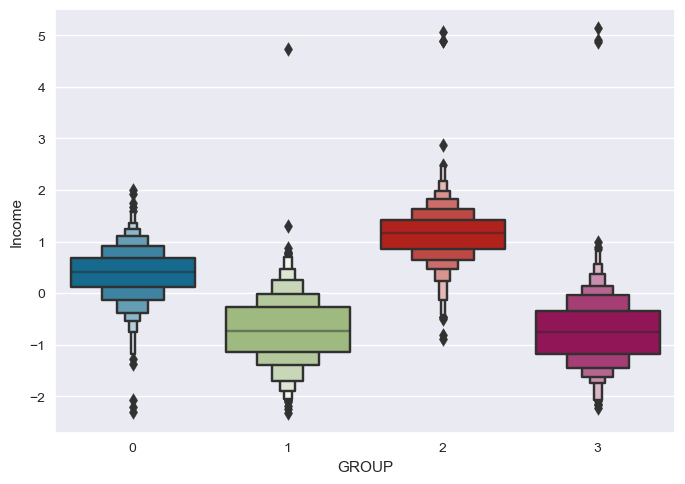

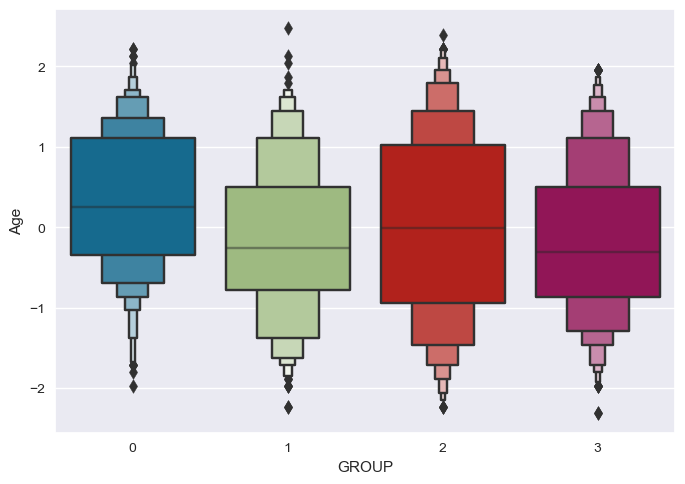

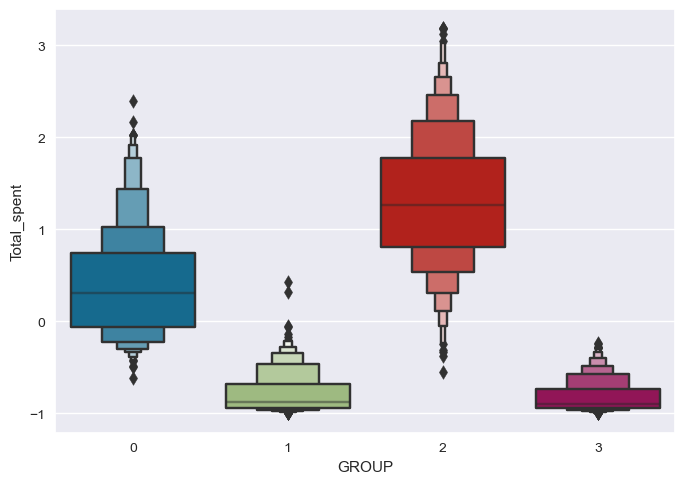

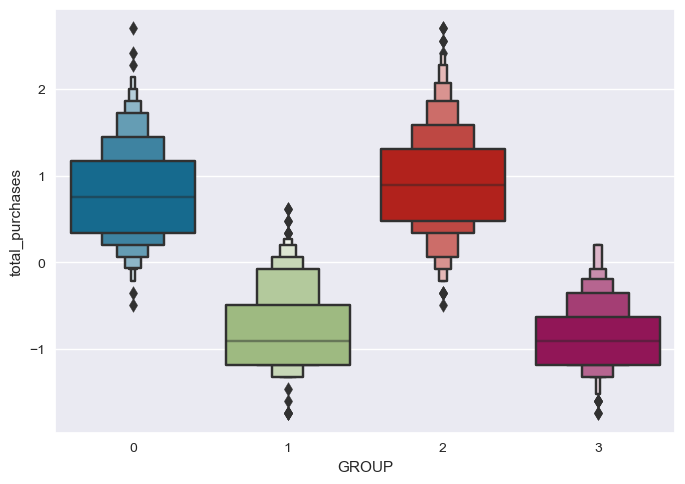

In [107]:
# lets create boxenplot 

features = ['Income', 'Age', 'Total_spent','total_purchases']
for feature in features:
    plt.figure()
    sns.boxenplot(y = df1_final[feature], x = df1_final["GROUP"], palette = sns.color_palette())
    plt.show()

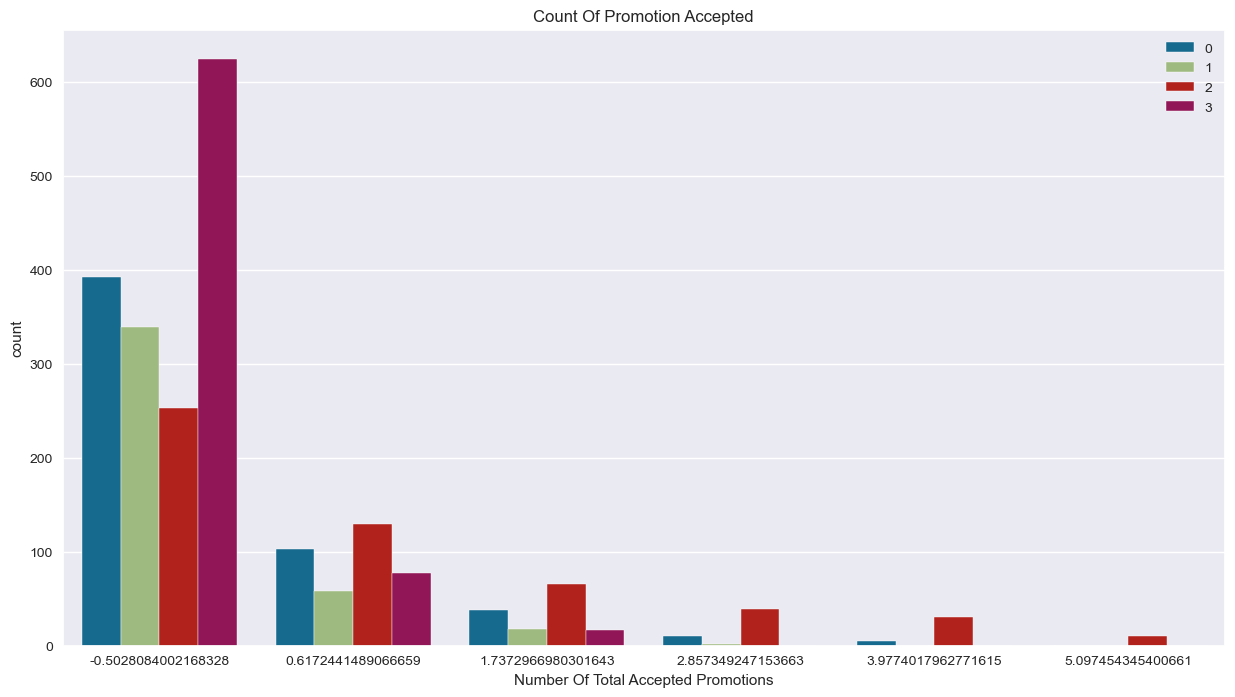

In [108]:
# how the groups/clusters responded to the campaigns.

fig, ax = plt.subplots(figsize=(15,8))
count_plot1 = sns.countplot(x = df1_final["Accepted_Cmp_total"], hue = df1_final["GROUP"], palette = sns.color_palette(),ax=ax)
count_plot1.set_title("Count Of Promotion Accepted")
count_plot1.set_xlabel("Number Of Total Accepted Promotions")
plt.legend(loc='upper right')
